<a href="https://colab.research.google.com/github/Sujith2k/An-Aid-for-the-Blind/blob/master/ML/Model_training/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
from google.colab.patches import cv2_imshow

In [0]:
images_boxable = pd.read_csv('https://datasets.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv')
images_boxable.head()

,image_name,image_url
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...


In [0]:
annotations_bbox = pd.read_csv('https://datasets.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv')
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [0]:
class_descriptions = pd.read_csv('drive/My Drive/cohort/Dataset/class-descriptions-boxable.csv')
class_descriptions.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [0]:
Classes = ['Stop sign','Person','Traffic sign','Traffic light','Bus','Car']

In [0]:
classes_pd = []
class_labels = []
class_bbox = []
class_imgID = []
sub_class_imgID = []
for class_name in  Classes:
    classes_pd.append( class_descriptions[class_descriptions['class'] == class_name])

print("Choosen Classes:\n")
for i in range(len(classes_pd)):
    print(classes_pd[i]['class'].values[0], end = '  :  ')
    print(classes_pd[i]['name'].values[0])
    class_labels.append(classes_pd[i]['name'].values[0])

Choosen Classes:

Stop sign  :  /m/02pv19
Person  :  /m/01g317
Traffic sign  :  /m/01mqdt
Traffic light  :  /m/015qff
Bus  :  /m/01bjv
Car  :  /m/0k4j


In [0]:
for i in range(len(class_labels)):
    class_bbox.append(annotations_bbox[annotations_bbox['LabelName']==class_labels[i]])
    class_imgID.append( np.unique(class_bbox[i]['ImageID']))
    
    print('There are %d images which contain ' % (len(class_imgID[i])),end = ' ')
    print(Classes[i], end = '\t')
    
    random.seed(1)
    random.shuffle(class_imgID[i])
    
    sub_class_imgID.append( class_imgID[i][0:10])
    print('Choosing %d '% (len(sub_class_imgID[i])), end = '\n\n')


There are 375 images which contain  Stop sign	Choosing 10 

There are 248384 images which contain  Person	Choosing 10 

There are 2817 images which contain  Traffic sign	Choosing 10 

There are 1774 images which contain  Traffic light	Choosing 10 

There are 7293 images which contain  Bus	Choosing 10 

There are 89465 images which contain  Car	Choosing 10 



In [0]:
# Searching for URLs
sub_class_imgURL = []
sub_annotations_bbox = []
for i in range(len(Classes)):
    URLS = [images_boxable['image_url'][images_boxable['image_name']==name+'.jpg'].values for name in sub_class_imgID[i]]
    sub_class_imgURL.append(URLS)
    [sub_annotations_bbox.append( data ) for data in class_bbox[i]]

c03daac1bd6c2c7a
https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/c03daac1bd6c2c7a.jpg
(768, 1024, 3)


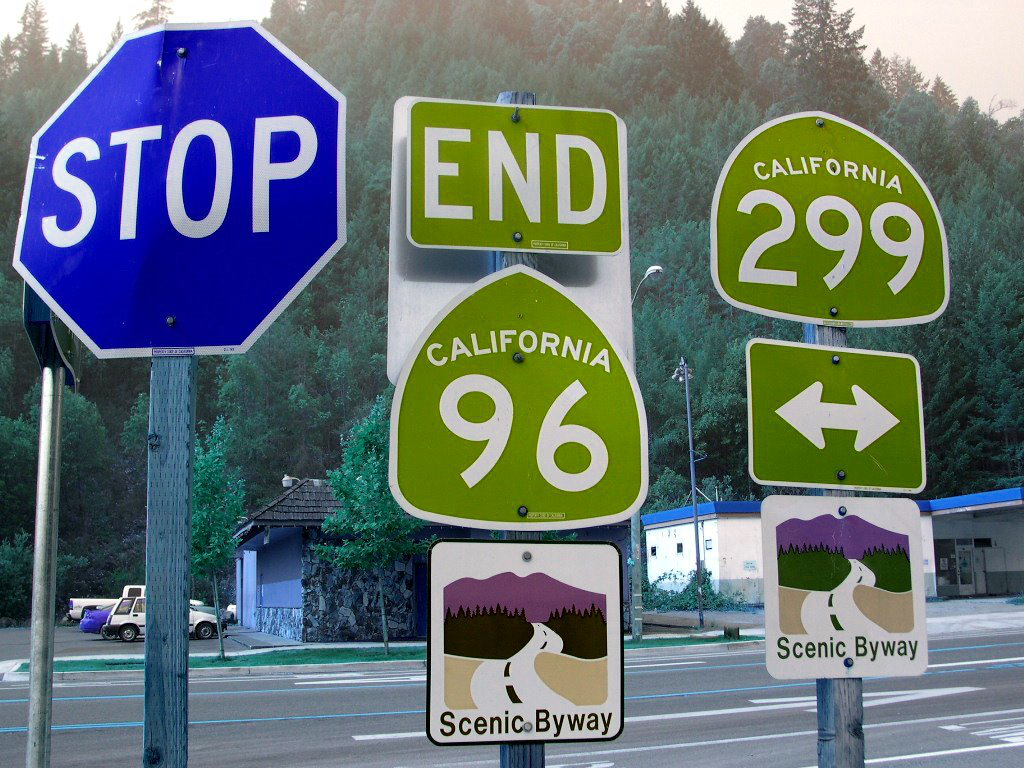

In [0]:
print(sub_class_imgID[0][9])
print(str(sub_class_imgURL[0][9])[2:-2])
img = io.imread(str(sub_class_imgURL[0][9])[2:-2])
print(img.shape)
cv2_imshow(img)

In [0]:
train_url ,train_ID = [] , []
test_url , test_ID = [] , []
for i in range(len(Classes)):
  [train_url.append(url) for url in sub_class_imgURL[i][ 0 : int(len(sub_class_imgURL[i])*0.9)]]
  [test_url.append(url)  for url in sub_class_imgURL[i][ int(len(sub_class_imgURL[i])*0.9) : ]]

  [train_ID.append(ID) for ID in sub_class_imgID[i][ 0 : int(len(sub_class_imgURL[i])*0.9)]]
  [test_ID.append(ID)  for ID in sub_class_imgID[i][ int(len(sub_class_imgURL[i])*0.9) : ]]

print('Total train images:',len(train_url))
print('Total test images:',len(test_url))
print(str(train_url[1])[2:-2])

Total train images: 54
Total test images: 6
https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/384b8b7bc363b1cd.jpg


In [0]:
f= open('drive/My Drive/cohort/Dataset/Open Images Dataset v4 (Bounding Boxes)/Sample/annotation.txt',"w+")
data_to_write = ''
for i in range(len(train_url)):
  img_id = train_ID[i]
  img_path = str(train_url[i])[2:-2]
  tmp_df = annotations_bbox[ annotations_bbox['ImageID'] == img_id]
  sys.stdout.write('\r' + 'Done :' + str(i+1)+ ' of ' + str(len(train_url)))
  sys.stdout.flush()
  #img = io.imread(img_path)
  #(rows,cols) = img.shape[:2]
  for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for j in range(len(class_labels)):
          if labelName == class_labels[j]:
            data_to_write += (img_path + ',' + str(float(row['XMin'])) + ',' + str(float(row['YMin'])) + ',' + str(float(row['XMax'])) + ',' + str(float(row['YMax'])) + ',' + Classes[j] + '\n')
f.write(data_to_write)
f.close()



Done :54 of 54

(768, 1024, 3)
Stop sign

(145, 39) (852, 690)


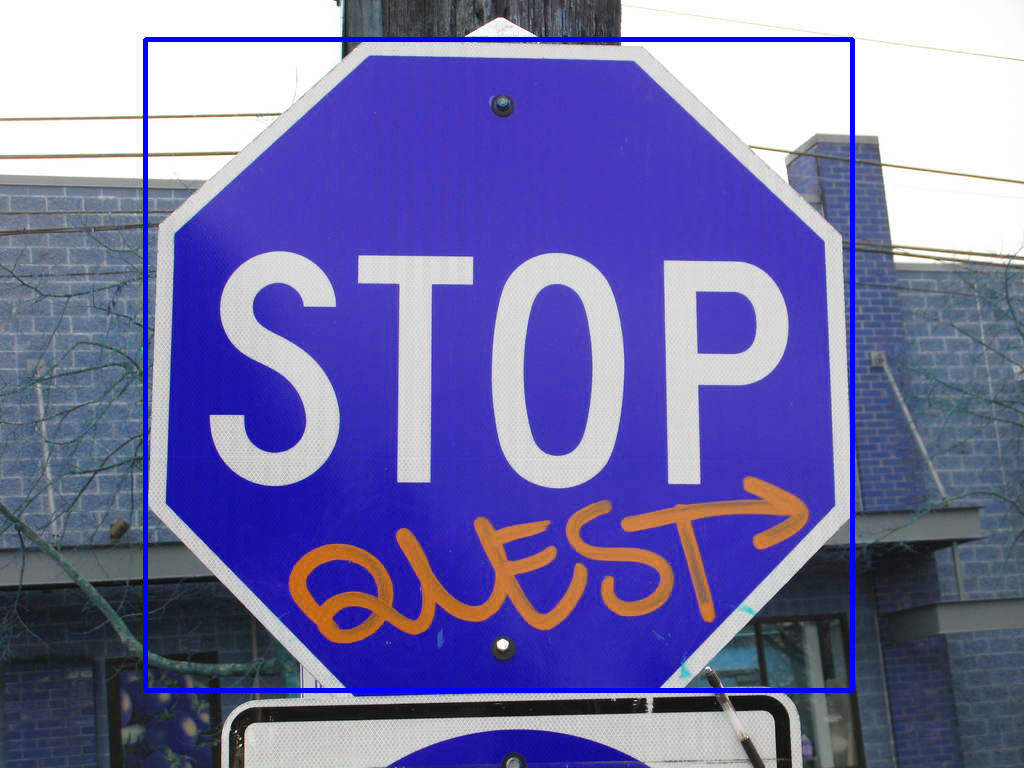

In [4]:
train_path =  'drive/My Drive/cohort/Dataset/Open Images Dataset v4 (Bounding Boxes)/Sample/annotation.txt'
f = open(train_path,'r')
i = 0
for line in f:
  
  img_path , r_min , c_min , r_max , c_max , clas = line.split(',')

  img = io.imread(img_path)
  rows,cols = img.shape[0:2]
  print(img.shape)
  print(clas)
  print(( int(float(r_min)*cols) ,int(float(c_min)*rows)) , (int(float(r_max)*cols),int(float(c_max)*rows)) )
  cv2.rectangle(img , ( int(float(r_min)*cols) ,int(float(c_min)*rows)) , (int(float(r_max)*cols),int(float(c_max)*rows)) , (255,0,0) , 3 )
  cv2_imshow(img)
  
  break

In [0]:
f= open('drive/My Drive/cohort/Dataset/Open Images Dataset v4 (Bounding Boxes)/Sample/test_annotation.txt',"w+")
data_to_write= ''
for i in range(len(test_url)):
  img_id = test_ID[i]
  img_path = str(test_url[i])[2:-2]
  tmp_df = annotations_bbox[ annotations_bbox['ImageID'] == img_id]
  sys.stdout.write('\r' + 'Done :' + str(i+1)+ ' of ' + str(len(test_url)))
  sys.stdout.flush()
  #img = io.imread(img_path)
  #(rows,cols) = img.shape[:2]
  for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for j in range(len(class_labels)):
          if labelName == class_labels[j]:
            data_to_write += (img_path + ',' + str(float(row['XMin'])) + ',' + str(float(row['YMin'])) + ',' + str(float(row['XMax'])) + ',' + str(float(row['YMax'])) + ',' + Classes[j] + '\n')
f.write(data_to_write)
f.close()



Done :6 of 6